<a href="https://colab.research.google.com/github/godud2604/AI-bootcamp/blob/main/%EB%B0%B0%ED%8F%AC_DL_Classification_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import scipy.signal as sp
import scipy.io as sio

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils import plot_model


# Multi-layered Percetron: XOR

In [3]:
x = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([0, 1, 1, 0])

### (1)  Sequential API

In [6]:
model = keras.Sequential()
# add() 메서드를 통해 Sequential 모델을 점진적으로 작성할 수도 있습니다.
model.add(keras.Input(shape=(2,))) # 입력층
# model.add( InputLayer( input_shape(2,)) ) # 입력층
model.add( Dense( 2, activation='sigmoid' ) ) # 은닉층 1
model.add( Dense( 1, activation='sigmoid' ) ) # 출력층

print("초기 가중치: ")
print( model.get_weights() )
print('초기 상태에서 신경망의 예측:')
print( model.predict(x) )


model.compile(loss= "binary_crossentropy",
              optimizer=  Adam(learning_rate= 1E-3) )
model.fit(  x, y  , epochs= 10_000  , verbose=  0 )

print( )
print("학습 후 가중치: ")
print( model.get_weights() )

pred = model.predict(x)

print('학습 후 신경망의 예측:')
print( pred )

초기 가중치: 
[array([[0.19483769, 1.1094931 ],
       [0.8093523 , 0.9522983 ]], dtype=float32), array([0., 0.], dtype=float32), array([[1.0926665],
       [1.4074689]], dtype=float32), array([0.], dtype=float32)]
초기 상태에서 신경망의 예측:
1/1 [==============================] - 0s 42ms/step
[[0.77731156]
 [0.8546679 ]
 [0.8399497 ]
 [0.88577735]]

학습 후 가중치: 
[array([[-6.881999 ,  6.7317166],
       [ 6.7112217, -6.6407175]], dtype=float32), array([-3.694732 , -3.7446394], dtype=float32), array([[6.9557548],
       [6.917922 ]], dtype=float32), array([-3.445001], dtype=float32)]
1/1 [==============================] - 0s 41ms/step
학습 후 신경망의 예측:
[[0.04243078]
 [0.9603127 ]
 [0.9585505 ]
 [0.04198206]]


In [7]:
(pred >= 0.5).astype(int)

array([[0],
       [1],
       [1],
       [0]])

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


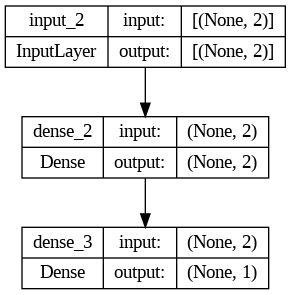

In [10]:
plot_model(model, show_shapes=True)

### (2) Functional API

In [11]:
inputs = keras.Input(shape=(2,))
h = Dense( 2, activation='sigmoid') (inputs) # hidden => dense층 (중간층)
outputs = Dense( 1, activation='sigmoid') (h)

model = keras.Model( inputs = inputs , outputs = outputs, name = 'XOR_MLP')

print("초기 가중치: ")
print( model.get_weights() )
print('초기 상태에서 신경망의 예측:')
print( model.predict(x) )

model.compile(loss= "binary_crossentropy",
              optimizer=  Adam(learning_rate= 1E-3) )
model.fit(  x, y  , epochs= 10_000  , verbose=  0 )

print( )
print("학습 후 가중치: ")
print( model.get_weights() )

pred = model.predict(x)

print('학습 후 신경망의 예측:')
print( pred  )


초기 가중치: 
[array([[-1.0692183 , -1.0072207 ],
       [ 0.51500154, -0.38740396]], dtype=float32), array([0., 0.], dtype=float32), array([[-0.86756825],
       [ 0.10188007]], dtype=float32), array([0.], dtype=float32)]
초기 상태에서 신경망의 예측:
1/1 [==============================] - 0s 46ms/step
[[0.4054411 ]
 [0.3770979 ]
 [0.45153928]
 [0.42645645]]



학습 후 가중치: 
[array([[-7.4796815, -8.218036 ],
       [ 7.1981573,  7.4118695]], dtype=float32), array([ 4.1658435, -3.8854928], dtype=float32), array([[-8.441005],
       [ 8.364029]], dtype=float32), array([4.229088], dtype=float32)]
1/1 [==============================] - 0s 46ms/step
학습 후 신경망의 예측:
[[0.01955796]
 [0.9804155 ]
 [0.98078865]
 [0.01859966]]


In [12]:
model.summary()

Model: "XOR_MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Projects

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
PATH = "/content/drive/MyDrive/biodata/"

In [ ]:
def compare(y_true, y_pred):
    d = pd.DataFrame()
    d["Actual"] = y_true
    d["Predict"] = y_pred
    d["residual"] = abs(y_true - y_pred)
    return d

In [ ]:
def plot_training_history(fit_history):
    # 학습이력 그래프로 확인하기
    vloss = fit_history.history.get('val_loss') # 검증셋 loss
    loss = fit_history.history.get('loss') # 학습셋

    plt.figure(figsize=(8,4))
    epoch = np.arange(len(loss))
    plt.subplot(211)
    if vloss != None:
        plt.plot(epoch, vloss, 'r',  marker='.',label='validation_loss')
    plt.plot(epoch, loss, 'b',  marker='.', label='loss')
    plt.legend(loc='best')


    vacc = fit_history.history.get('val_accuracy') # 검증셋 정확도
    acc = fit_history.history.get('accuracy') # 학습셋
    if acc != None:
        plt.subplot(212)
        if vacc != None:
            plt.plot(epoch, vacc, 'r', marker='.',label='validation_acc')
        plt.plot(epoch, acc, 'b', marker='.', label='accuracy')
        plt.legend(loc='best')
    plt.show()

In [ ]:
def dispConfusionMatrix(y_true, y_pred):
    plt.figure( figsize=(4,3))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d' )
    plt.xlabel('Predicted')
    plt.ylabel('Ground truth')
    plt.show()

# 1. Heart Disease Prediction

In [ ]:
df = pd.read_csv(PATH+'heart_NOdup.csv')
df.info()

In [ ]:
y = df['target']
x = df.drop(['target'], axis = ).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [ ]:
scaler = StandardScaler()
columns_to_scale =
x_train [ columns_to_scale ] =  scaler. ( x_train [columns_to_scale] )
x_test [ columns_to_scale ] =  scaler. ( x_test [columns_to_scale] )


In [ ]:
model = keras.Sequential()


model.compile(loss=   ,
             optimizer= ,
              metrics=['accuracy'])

# 모델 저장 조건 설정
modelfile = PATH+'heart_best.h5'
checkpointer =  ModelCheckpoint(filepath=modelfile, monitor=  ,
                               verbose= , save_best_only=  )

# 학습의 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor= ,
                                        patience=  ,
                                       verbose= )

# learning rate 조정
reduce_lr = ReduceLROnPlateau(monitor=  , factor=   ,
                              patience=   , min_lr=  , verbose= )


fit_history = model.fit(x_train, y_train,
                        validation_data=    ,
                        epochs=    , batch_size=   , verbose= ,
                      callbacks=[  ])

print("Training accuracy: %.3f"% model.evaluate(x_train, y_train)[1]  )
print("Test accuracy: %.3f"% model.evaluate(x_test, y_test)[1]  )

In [ ]:
model

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
fit_history.history

In [ ]:
 plot_training_history(fit_history)

In [ ]:
optimal_model =   (PATH+"heart_best.h5")
print("Optimal model:" )
print("Train set accuracy: %.4f" % (optimal_model.evaluate(x_train, y_train)[1]))
print("Test set accuracy: %.4f" % (optimal_model.evaluate(x_test, y_test)[1]))

## 예측값(Predicted values)

In [ ]:
pred =


In [ ]:
y_pred =
compare( y_test, y_pred)

In [ ]:
dispConfusionMatrix( y_test, y_pred )

- 오답 분석

In [ ]:
idx =

In [ ]:
inc_df =

## 교차검증

In [ ]:
x_scaled = x
scaler = StandardScaler()
x_scaled =  scaler.fit_transform( x_scaled)
print(x_scaled.shape)

In [ ]:
from sklearn.model_selection import StratifiedKFold
seed = 0

n_fold =
skf = StratifiedKFold( n_splits=n_fold, shuffle=True, random_state=seed)

accuracy_list = []
for train_index, test_index in skf( ):

    x_train, x_test =
    y_train, y_test =

    model.compile(   )
    model.fit(x_train, y_train, epochs=2000, batch_size=64, verbose=0)

    accuracy_list.append( model.evaluate(x_test, y_test)[1] )
else:
    print(n_fold,"-fold accuracy: ", accuracy_list)
    print("Average accuracy: %.4f" % (sum(accuracy_list)/n_fold) )

## 차원 축소

In [ ]:
from sklearn.decomposition import PCA
my_pca = PCA(  )

In [ ]:
# 주성분 보기
plt.figure( figsize=(10,10))

sns.heatmap(my_pca.components_, annot=True, fmt='.1f' )


In [ ]:



modelfile = PATH+'heart_pca_best.h5'


# 2. ECG signal classification

In [ ]:
import pickle

# pickle  .pkl: 파이썬의 모든 객체(object)에 대해서 있는 그대로 저장할 수 있는 파일 형식

def load_dataset(filename, extension = '.csv', directory = PATH):
    if 'csv' in extension:
        data = pd.read_csv(directory+filename+extension)
    elif 'pkl' in extension:
        data = pd.DataFrame(pickle.load(open(directory+filename+extension, 'rb')))
    return data

- ARR(Arrhythmia)
- https://litfl.com/sinus-arrhythmia-ecg-library/

- CHF(Congestive heart failure)
- https://www.wikidoc.org/index.php/Congestive_heart_failure_electrocardiogram

- NSR (Normal Sinus Rhythm)
- https://litfl.com/normal-sinus-rhythm-ecg-library/

## read data

In [ ]:
fs = 128
df = load_dataset('ecg_signal_classification', extension = '.pkl', directory=PATH)
df.head()

In [ ]:
df.target

In [ ]:
def plot_signal(y, fs):
    time = np.arange(0, len(y)) * (1 / fs)
    plt.figure( figsize= (20, 3))
    plt.plot(time, y, linestyle='-', color='blue')
    plt.xlabel('Time [s]', fontsize=16)
    plt.ylabel('Amplitude', fontsize=16)
    plt.title('Signal', fontsize=16)
    plt.show()

In [ ]:
plot_signal(df.iloc[    ], fs)  # 0, 4000, 5000

In [ ]:
from scipy.fft import fft, ifft

def get_fft(y, fs, vis = False):
    sr = fs * 2
    N = len(y)
    f = np.linspace(0.0, sr, N)
    fft_tmp = fft(y)
    fft_ = 2.0 / N * np.abs(fft_tmp[:N])

    ifft_ =  ifft(fft_tmp)

    if vis:
        plot_signal(y, fs )

        plt.figure(figsize=(20, 8))
        plt.subplot(211)
        plt.plot(f, fft_, linestyle='-', color='blue')
        plt.xlabel('Frequency [Hz]', fontsize=16)
        plt.ylabel('Amplitude', fontsize=16)
        plt.title('Frequency Transform', fontsize=16)
        plt.xlim((0, sr))
        plt.subplot(212)
        time = np.arange(0, len(ifft_))* (1 / fs)
        plt.plot(time, ifft_, linestyle='-', color='red')
        plt.xlabel('Signal', fontsize=16)
        plt.ylabel('Amplitude', fontsize=16)
        plt.show()

        plt.figure(figsize=(20, 3))
        plt.plot(fft_[1:N//2])
        plt.xlim((0, N//2))
        plt.show()


    return f, fft_[  :N//2]

In [ ]:
signal = df.iloc[0, 0:-1]  # 0, 100, 161, 4000, 5000
f, fft_c = get_fft(signal, fs, vis=True)

In [ ]:
# frequency transform
fft_coef = [ ]
for i in range(df.shape[0]):
    _, fft_c = get_fft(    )
    fft_coef.append( fft_c )
ecg_fft =
ecg_fft.shape

In [ ]:
# one-hot encoding
df =
df.info()

In [ ]:
df.columns

In [ ]:
y =
x =
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [ ]:
model = keras.Sequential()


model.compile(loss= ,
             optimizer= ,
              metrics=['accuracy'])

# 모델 저장 조건 설정
modelfile = PATH+'ecg_best.h5'
checkpointer = ModelCheckpoint(filepath= , monitor= ,
                               verbose= , save_best_only=  )

# 학습의 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor= ,
                                        patience= )


fit_history = model.fit(x_train, y_train,
                        validation_data= ,
                        epochs= , batch_size= , verbose= ,
                      callbacks=[ ])

print("Training accuracy: %.3f"% model.evaluate(x_train, y_train)[1])
print("Test accuracy: %.3f"% model.evaluate(x_test, y_test)[1])

In [ ]:
# 학습 이력 확인


In [ ]:
optimal_model = load_model(PATH+"ecg_best.h5")
print("Optimal model:" )
print("Train set accuracy: %.4f" % (optimal_model.evaluate(x_train, y_train)[1]))
print("Test set accuracy: %.4f" % (optimal_model.evaluate(x_test, y_test)[1]))



In [ ]:
y_pred =
y_true =

dispConfusionMatrix(y_true, y_pred)

# 3. Regression

In [ ]:
def evaluation(x, y, model) :
    pass

In [ ]:
dataset = pd.read_csv(PATH + 'insurance.csv')

## SLP

## DNN